In [64]:
import pickle
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from IPython import display
from tensorflow.keras.preprocessing import image
from tensorflow.image import resize, resize_with_pad
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Using EfficientNetB0

We are going to use the pre-trained model called efficientnetb0 which is already trained with large datasets to extract the features from images.

This function returns a Keras image classification model, optionally loaded with weights pre-trained on ImageNet.

Instantiate the model:

In [71]:
CNN_model = EfficientNetB0(
    include_top=False, # Whether to include the fully-connected layer at the top of the network
    weights='imagenet', # pre-trained weights on ImageNet
    input_tensor=None,
    input_shape= (500,300,3), # It should have exactly 3 inputs channels
    pooling=None # Optional pooling mode for feature extraction when include_top is False
)

For EfficientNet, input preprocessing is included as part of the model (as a Rescaling layer), and thus tf.keras.applications.efficientnet.preprocess_input is actually a pass-through function. EfficientNet models expect their inputs to be float tensors of pixels with values in the [0-255] range

## Predicting using one image

In [3]:
img_path = '../raw_data/images/10815824_2997e03d76.jpg'

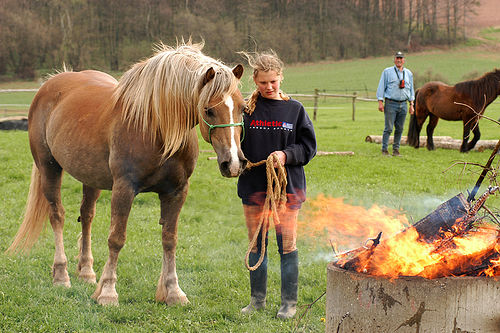

In [4]:
display.Image(img_path)

In [76]:
img = image.load_img(img_path, target_size=(256,256,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [77]:
features = CNN_model.predict(x)

1/1 [==============================] - 1s 1s/step


In [78]:
features.shape

(1, 8, 8, 1280)

In [60]:
type(features)

numpy.ndarray

## Predict and store in ONE file

List of the 6000 images:

In [61]:
img_list_path = '../raw_data/text/Flickr_8k.trainImages.txt'

In [63]:
img_list = np.loadtxt(img_list_path, dtype=str)

In [66]:
img_list[0]

'2513260012_03d33305cf.jpg'

In [67]:
img_list.shape

(6000,)

Function to loop through images and predict:

In [73]:
img_folder_path = '../raw_data/images/'

In [176]:
def extract_features_to_dict(img_list, img_folder_path, filename):
    features_dict = {}
    for image_name in img_list:
        img_path = img_folder_path+image_name
        img = image.load_img(img_path, target_size=(256,256,3))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        features = CNN_model.predict(x)
        image_title = image_name.split('.')[0]
        
        features_dict[image_title] = features
        
    file = open(filename,"wb")
    pickle.dump(features_dict, file) 
    file.close()

In [193]:
features_file = '../extracted_features/extract_features_6k.pkl'
img_folder_path = '../raw_data/images/'

In [194]:
extract_features_to_dict(img_list, img_folder_path, features_file)

1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 78ms/step


In [182]:
file = open(features_file, "rb")
file_contents = pickle.load(file)
len(file_contents)

5

## Predict and store one file per image

In [186]:
def extract_features_one_per_image(img_list, img_folder_path, features_path):
    for image_name in img_list:
        img_path = img_folder_path+image_name
        img = image.load_img(img_path, target_size=(256,256,3))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        features = CNN_model.predict(x)
        image_title = image_name.split('.')[0]
        
        filename = features_path+image_title+'.pkl'
        file = open(filename,"wb")
        pickle.dump(features, file) 
        file.close()

In [195]:
features_path = '../extracted_features/file_per_image/'
img_folder_path = '../raw_data/images/'

In [196]:
extract_features_one_per_image(img_list, img_folder_path, features_path)

1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 105ms/step
